<a href="https://colab.research.google.com/github/Ramaseshanr/anlp/blob/master/CosDistance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       D0    D1    D2    D3    D4    D5    D6    D7    D8    D9   D10
D0    0.0   4.0  90.0  14.6  50.6  64.8  41.9  64.6  74.6  72.1  56.9
D1    4.0   0.0  90.0  11.5  52.6  66.0  42.3  67.3  75.3  73.7  59.0
D2   90.0  90.0   0.0  86.4  66.1  71.8  59.5  81.4  57.6  41.7  61.7
D3   14.6  11.5  86.4   0.0  57.6  70.0  40.2  71.3  71.0  75.3  62.5
D4   50.6  52.6  66.1  57.6   0.0  29.5  48.9  53.8  60.8  31.9  36.1
D5   64.8  66.0  71.8  70.0  29.5   0.0  58.1  54.3  66.9  40.5  61.2
D6   41.9  42.3  59.5  40.2  48.9  58.1   0.0  63.0  56.4  53.5  50.5
D7   64.6  67.3  81.4  71.3  53.8  54.3  63.0   0.0  54.3  51.1  69.1
D8   74.6  75.3  57.6  71.0  60.8  66.9  56.4  54.3   0.0  50.3  69.2
D9   72.1  73.7  41.7  75.3  31.9  40.5  53.5  51.1  50.3   0.0  44.5
D10  56.9  59.0  61.7  62.5  36.1  61.2  50.5  69.1  69.2  44.5   0.0
        D0     D1     D2     D3     D4  ...     D6     D7     D8     D9    D10
D0   0.000  0.002  1.000  0.032  0.365  ...  0.256  0.572  0.734  0.693  0.454
D1

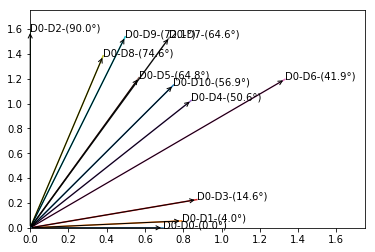

In [1]:
from numpy import *
from numpy import dot
from numpy.linalg import norm
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt


def cosine_distance(a, b):
    return 1 - cosine_similarity(a,b)


def cosine_similarity(a, b):
    return dot(a, b) / (norm(a) * norm(b))


def find_end_points(point, angle, length):
    '''
    #Source - https://stackoverflow.com/questions/28417604/plotting-a-line-from-a-coordinate-with-and-angle
    #
    point - Tuple (x, y)
    angle - Angle you want your end point at in degrees.
    length - Length of the line you want to plot.

    Will plot the line on a 10 x 10 plot.
    '''

    # unpack the first point
    x, y = point

    # find the end point
    endy = length * math.sin(math.radians(angle))
    endx = length * math.cos(math.radians(angle))

    # plot the points
    # fig = plt.figure()
    # ax = plt.subplot(111)

    return ([x, endx], [y, endy])
    # ax.plot([x, endx], [y, endy])

    # return fig


column_header = ['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10']
row_header = ['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10']
doc_term = array([
    # D0   D1   D2   D3   D4   D5   D6   D7   D8   D9   D10  D11
    [0.1, 0.1, 0.0, 0.1, 0.2, 0.0, 0.1, 0.9, 0.9, 0.3, 0.0, 0.8],
    [0.1, 0.1, 0.0, 0.1, 0.0, 0.0, 0.1, 0.9, 0.0, 0.3, 0.0, 0.8],
    [0.0, 0.0, 0.9, 0.0, 0.3, 0.1, 0.7, 0.0, 0.2, 0.7, 0.5, 0.5],
    [0.0, 0.0, 0.9, 0.1, 0.0, 0.1, 0.9, 0.3, 0.8, 0.4, 0.1, 0.4],
    [0.0, 0.0, 0.0, 0.0, 0.5, 0.9, 0.3, 0.7, 0.4, 0.6, 0.0, 0.3],
    [0.5, 0.6, 0.0, 0.7, 0.3, 0.3, 0.9, 0.1, 0.0, 0.0, 0.0, 0.3],
    [0.0, 0.0, 0.8, 0.0, 0.6, 0.6, 0.0, 0.1, 0.4, 0.9, 0.3, 0.1],
    [0.35, 0.4, 0.0, 0.5, 0.5, 0.1, 0.7, 0.1, 0.5, 0.3, 0.8, 0.1],
    [0.3, 0.3, 0.0, 0.2, 0.8, 0.7, 0.7, 0.8, 0.0, 0.6, 0.8, 0.0],
    [0.0, 0.0, 0.5, 0.0, 0.2, 0.0, 0.0, 0.1, 0.0, 0.4, 0.5, 0.3]
])

cos_similarity_list = []
pd_cols_cos_similarity = []
cos_distance_list = []
pd_cols_cos_distance = []

for i in range(0, 11):
    for j in range(0, 11):
        cos_value = cosine_similarity(transpose(doc_term[:, [i]]), doc_term[:, [j]])
        cos_distance = 1.0 - cos_value
        cos_distance_list.append(asscalar(around(cos_distance,decimals=3)))
        cos_similarity_list.append(
            asscalar(around(math.degrees(math.acos(min(max(cos_value, -1.0), 1.0))), decimals=1)))
    pd_cols_cos_similarity.append(cos_similarity_list)
    pd_cols_cos_distance.append(cos_distance_list)

    cos_similarity_list = []
    cos_distance_list = []

df_cos_sim = pd.DataFrame(pd_cols_cos_similarity, columns=column_header, index=row_header)
print(df_cos_sim)

df_cos_dist = pd.DataFrame(pd_cols_cos_distance, columns=column_header, index=row_header)
print(df_cos_dist)

fig = plt.figure()
ax = plt.subplot(111)
ax.set_ylim([0, 1.75])
ax.set_xlim([0, 1.75])

ref_doc = 0
for i in range(0, 11):
    X, Y = find_end_points([0, 0], df_cos_sim.iloc[ref_doc][i], norm(doc_term[:, [i]]))
    ax.plot(X, Y)
    ax.annotate("", xy=(X[1], Y[1]), xytext=(0, 0), arrowprops=dict(arrowstyle="->"))
    ax.text(X[1], Y[1], "D" + str(ref_doc) + "-" + "D" + str(i) + "-(" + str(df_cos_sim.iloc[ref_doc][i]) + u"\u00b0" + ")")
fig.show()
query = "D" + str(ref_doc)
rank_order = df_cos_sim.sort_values(query)
print ("\n\nDocument Rank for the query ", query)
print(rank_order[query])